### Experiments: Comparing RSAST with other methods (stream)

In [11]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path



['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nir

In [12]:

from sast import *
from utils_sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
from sklearn.linear_model import RidgeClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform



In [13]:
ds_sens = tsc_dataset_names.univariate_equal_length

ds = pd.read_excel("DataSetsUCLASummary.xlsx")
ds = ds[ds["USED SAST"]=="Y"]
#ds = ds[ds["USED RSAST ADA"].isna()]

#ds_sens = ['ACSF1', 'Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee']

ds_sens = ds.Name.unique()
ds_sens =  ['ElectricDevices']
max_ds=len(ds_sens) #exploring dataset in UEA & UCR Time Series Classification Repository
print(max_ds)
print(ds_sens)


1
['ElectricDevices']


In [14]:
#define numbers of runs of the experiment
runs = 3

not_found_ds =[]
df_result = {}
list_score = []
list_time = []
list_dataset = []
list_hyperparameter = []
list_method = []
list_rpoint = []
list_nb_per_class = []


for ds in ds_sens:
    
    try:
        
        X_train, y_train = load_UCR_UEA_dataset(name=ds, extract_path='data', split="train", return_type="numpy2d")
        X_test, y_test = load_UCR_UEA_dataset(name=ds, extract_path='data', split="test", return_type="numpy2d")
        print("ds="+ds)
    except:
        print("not found ds="+ds)
        not_found_ds.append(ds)
        continue

    for i in range(runs):
        
        p=10
        k=10
        
        print("RSAST None: n_random_points= "+str(p)+" nb_inst_per_class="+str(k))
        start = time.time()
        random_state = None
        rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="None", classifier=RidgeClassifierCV())
        rsast_ridge.fit(X_train, y_train)
        end = time.time()
        list_score.append(rsast_ridge.score(X_test,y_test))

        list_time.append(end-start)
        list_dataset.append(ds)
        list_hyperparameter.append("None: n_random_points= "+str(p)+" nb_inst_per_class="+str(k))
        list_rpoint.append(str(p))
        list_nb_per_class.append(str(k))
        list_method.append("RSAST None")

        
        
        p=10
        k=10
        print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
        start = time.time()
        random_state = None
        rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=RidgeClassifierCV())
        rsast_ridge.fit(X_train, y_train)
        end = time.time()
        list_score.append(rsast_ridge.score(X_test,y_test))
        list_time.append(end-start)
        list_dataset.append(ds)
        list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
        list_rpoint.append(str(p))
        list_nb_per_class.append(str(k))
        list_method.append("RSAST ACF&PACF")

        p=10
        k=10
        print("RSAST All: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
        start = time.time()
        random_state = None
        rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="all", classifier=RidgeClassifierCV())
        rsast_ridge.fit(X_train, y_train)
        end = time.time()
        list_score.append(rsast_ridge.score(X_test,y_test))
        list_time.append(end-start)
        list_dataset.append(ds)
        list_hyperparameter.append("All: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
        list_rpoint.append(str(p))
        list_nb_per_class.append(str(k))
        list_method.append("RSAST All")

       
        print("ROCKET: kernels=10_000")
        start = time.time()
        rocket= RocketClassifier(num_kernels=10_000)
        rocket.fit(X_train,y_train)
        end = time.time()
        list_score.append(rocket.score(X_test,y_test))
        list_time.append(end-start)
        list_dataset.append(ds)
        list_hyperparameter.append("num_kernels=10_000")
        list_rpoint.append(str(0))
        list_nb_per_class.append(str(0))
        list_method.append("Rocket")
        
        '''
        min_shp_length = 3
        print("STC: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(np.inf))
        
        max_shp_length = X_train.shape[1]
        start = time.time()
        #Creating a ShapeletTransform and fitting
        st = ShapeletTransform(min_shapelet_length=min_shp_length, max_shapelet_length=np.inf)
        X_train_sktime = from_2d_array_to_nested(pd.DataFrame(X_train))
        X_test_sktime = from_2d_array_to_nested(pd.DataFrame(X_test))
        st.fit(X_train_sktime, y_train)
        #Making the tranformation of time series and training a RandomForestClassifier model
        X_test_transformed = st.transform(X_test_sktime)
        X_train_transformed = st.transform(X_train_sktime)
        clf = RandomForestClassifier()
        clf.fit(X_train_transformed, y_train)
        
        end = time.time()
        list_score.append(clf.score(X_test_transformed, y_test))
        list_time.append(end-start)
        list_dataset.append(ds)
        list_hyperparameter.append("min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(max_shp_length))
        list_rpoint.append(str(0))
        list_nb_per_class.append(str(0))
        list_method.append("STC")  
        '''
        k=1

        #candidate_lengths = np.arange(min_shp_length, max_shp_length+1)

        min_shp_length = 3
        max_shp_length = X_train.shape[1]
        candidate_lengths = np.arange(3, max_shp_length)
        min_shp_length = min(candidate_lengths)
        max_shp_length = max(candidate_lengths)
        print("SAST: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(X_train.shape[1]))
        start = time.time()
        

        random_state = None
        

        sast_ridge = SAST(cand_length_list=candidate_lengths,
                                nb_inst_per_class=k, 
                                random_state=random_state, classifier=RidgeClassifierCV())

        sast_ridge.fit(X_train, y_train)
        end = time.time()    
        list_score.append(sast_ridge.score(X_test, y_test))
        list_time.append(end-start)
        list_dataset.append(ds)
        list_hyperparameter.append("min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(max_shp_length))
        list_rpoint.append(str(0))
        list_nb_per_class.append(str(0))
        list_method.append("SAST")  
        

df_result['accuracy']=list_score
df_result['time']=list_time
df_result['dataset_name']=list_dataset
df_result['hyperparameter']=list_hyperparameter
df_result['rpoint']=list_rpoint
df_result['nb_per_class']=list_nb_per_class
df_result['classifier_name']=list_method
df_result=pd.DataFrame(df_result)
# export a overall dataset with the comparison
df_result.to_csv("results_comparison_accuracy/df_overall_comparison_results.csv")

ds=ElectricDevices
RSAST None: n_random_points= 10 nb_inst_per_class=10
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=10


In [4]:
sast_ridge.get_params()

NameError: name 'sast_ridge' is not defined

In [5]:
df_result=pd.read_csv("results_comparison_accuracy/df_overall_comparison_results.csv")
df_result.columns

Index(['Unnamed: 0', 'accuracy', 'time', 'dataset_name', 'hyperparameter',
       'rpoint', 'nb_per_class', 'classifier_name'],
      dtype='object')

In [6]:
df_result.time.sum()/(60*60)

0.4177000709374746

In [7]:
start = time.time()
random_state = None
rsast_ridge = RSAST(n_random_points=100,nb_inst_per_class=10, len_method="all", classifier=RidgeClassifierCV())
rsast_ridge.fit(X_train, y_train)
print(rsast_ridge.score(X_test,y_test))
end = time.time()

NameError: name 'X_train' is not defined

In [8]:
end-start

NameError: name 'end' is not defined

In [10]:
pd.pivot_table(df_result, values=['time'], index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')/60

,time
dataset_name,Fungi
classifier_name,
RSAST ACF&PACF,0.090851
RSAST All,0.359110
RSAST None,0.014222
Rocket,0.019915
SAST,4.528304


In [47]:
df_pivot=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_pivot=df_pivot.reset_index()
pd.pivot_table(df_pivot, values=['accuracy'], index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')

,accuracy
dataset_name,Fungi
classifier_name,
RSAST ACF&PACF,1.000000
RSAST All,0.881720
RSAST None,0.900000
Rocket,1.000000
SAST,0.897849


In [10]:
from cd_function import *

#generate hyperparameter tuning cd diagrams
draw_cd_diagram(df_pivot, labels=True, title="RSAST vs other methods", name_file='images_cd_diagram/cd-diagram_overall_comparison_other_method2.png')


the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [ ]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(df_result, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')

t_score_by_method=score_by_method.transpose()
t_score_by_method.columns
#t_score_by_method[[hyperparameter,"STC","ROCKET"]]


Index(['RSAST ACF&PACF', 'RSAST All', 'RSAST None', 'Rocket', 'SAST'], dtype='object', name='classifier_name')

In [ ]:
for method in t_score_by_method.columns:
    x=t_score_by_method["Rsast"]
    y=t_score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_xlabel('RSAST')
    ax.set_ylabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/RSASTvs'+method+'2.png')

KeyError: 'Rsast'

## Plotting top most important features over the generators

In [ ]:
features =rsast_ridge.kernel_orig_
scores = rsast_ridge.classifier.coef_[0]
features = zip(features, scores)
sorted_features = sorted(features, key=itemgetter(1), reverse=True)



[(array([6.4281417, 7.0501546, 7.610883 , 8.0244697, 8.1940853, 8.3085518,
       8.6318812, 9.0484964, 9.3572299, 9.4681189, 9.2003142, 8.5195292,
       7.353009 , 5.8687563, 4.5982223, 3.5866072, 2.8620112, 2.4118991,
       2.1650417, 2.112409 , 2.1790603, 2.2213956, 2.2077397, 2.0724563,
       1.8998007, 1.9365691, 2.1549843, 2.406636 , 2.6450391, 2.726097 ,
       2.6743981, 2.7055103, 2.8402653, 3.0084774, 3.1984219, 3.4201248,
       3.6697014, 3.8774496, 4.0271135, 4.1702945, 4.3259701, 4.5237542,
       4.7760011, 5.0955147, 5.5589373, 6.1424308, 6.5674246, 6.7918788,
       6.9733542, 7.1430639, 7.177235 , 7.0459677, 6.9212759, 6.8663495,
       6.8029943, 6.6928632, 6.4328328, 5.9655245, 5.4335507, 4.936145 ,
       4.5417403, 4.3091851, 4.190264 , 4.133012 , 4.1539259, 4.275123 ,
       4.4688466, 4.6892374, 4.9371379, 5.3362809, 5.9652832, 6.8347979,
       7.9531583]), 2.6718037163404418e-05)]
[(array([5.2549793, 5.8067921, 6.4281417, 7.0501546, 7.610883 , 8.0244697,
  

In [ ]:
print(sorted_features[1:2])


[(array([6.4281417, 7.0501546, 7.610883 , 8.0244697, 8.1940853, 8.3085518,
       8.6318812, 9.0484964, 9.3572299, 9.4681189, 9.2003142, 8.5195292,
       7.353009 , 5.8687563, 4.5982223, 3.5866072, 2.8620112, 2.4118991,
       2.1650417, 2.112409 , 2.1790603, 2.2213956, 2.2077397, 2.0724563,
       1.8998007, 1.9365691, 2.1549843, 2.406636 , 2.6450391, 2.726097 ,
       2.6743981, 2.7055103, 2.8402653, 3.0084774, 3.1984219, 3.4201248,
       3.6697014, 3.8774496, 4.0271135, 4.1702945, 4.3259701, 4.5237542,
       4.7760011, 5.0955147, 5.5589373, 6.1424308, 6.5674246, 6.7918788,
       6.9733542, 7.1430639, 7.177235 , 7.0459677, 6.9212759, 6.8663495,
       6.8029943, 6.6928632, 6.4328328, 5.9655245, 5.4335507, 4.936145 ,
       4.5417403, 4.3091851, 4.190264 , 4.133012 , 4.1539259, 4.275123 ,
       4.4688466, 4.6892374, 4.9371379, 5.3362809, 5.9652832, 6.8347979,
       7.9531583]), 2.6718037163404418e-05)]


In [ ]:
print(sorted_features[2:3])


[(array([5.2549793, 5.8067921, 6.4281417, 7.0501546, 7.610883 , 8.0244697,
       8.1940853, 8.3085518, 8.6318812, 9.0484964, 9.3572299, 9.4681189,
       9.2003142, 8.5195292, 7.353009 , 5.8687563, 4.5982223, 3.5866072,
       2.8620112, 2.4118991, 2.1650417, 2.112409 , 2.1790603, 2.2213956,
       2.2077397, 2.0724563, 1.8998007, 1.9365691, 2.1549843, 2.406636 ,
       2.6450391, 2.726097 , 2.6743981, 2.7055103, 2.8402653, 3.0084774,
       3.1984219, 3.4201248, 3.6697014, 3.8774496, 4.0271135, 4.1702945,
       4.3259701, 4.5237542, 4.7760011, 5.0955147, 5.5589373, 6.1424308,
       6.5674246, 6.7918788, 6.9733542, 7.1430639, 7.177235 , 7.0459677,
       6.9212759, 6.8663495, 6.8029943, 6.6928632, 6.4328328, 5.9655245,
       5.4335507, 4.936145 , 4.5417403, 4.3091851, 4.190264 , 4.133012 ,
       4.1539259, 4.275123 , 4.4688466, 4.6892374, 4.9371379, 5.3362809,
       5.9652832, 6.8347979, 7.9531583, 9.4217617]), 2.599348803138969e-05)]


In [ ]:
print(sorted_features[3:4])

[(array([6.4281417, 7.0501546, 7.610883 , 8.0244697, 8.1940853, 8.3085518,
       8.6318812, 9.0484964, 9.3572299, 9.4681189, 9.2003142, 8.5195292,
       7.353009 , 5.8687563, 4.5982223, 3.5866072, 2.8620112, 2.4118991,
       2.1650417, 2.112409 , 2.1790603, 2.2213956, 2.2077397, 2.0724563,
       1.8998007, 1.9365691, 2.1549843, 2.406636 , 2.6450391, 2.726097 ,
       2.6743981, 2.7055103, 2.8402653, 3.0084774, 3.1984219, 3.4201248,
       3.6697014, 3.8774496, 4.0271135, 4.1702945, 4.3259701, 4.5237542,
       4.7760011, 5.0955147, 5.5589373, 6.1424308, 6.5674246, 6.7918788,
       6.9733542, 7.1430639, 7.177235 , 7.0459677, 6.9212759, 6.8663495,
       6.8029943, 6.6928632, 6.4328328, 5.9655245, 5.4335507, 4.936145 ,
       4.5417403, 4.3091851, 4.190264 , 4.133012 , 4.1539259, 4.275123 ,
       4.4688466, 4.6892374, 4.9371379, 5.3362809, 5.9652832, 6.8347979,
       7.9531583, 9.4217617]), 2.5849691001625893e-05)]


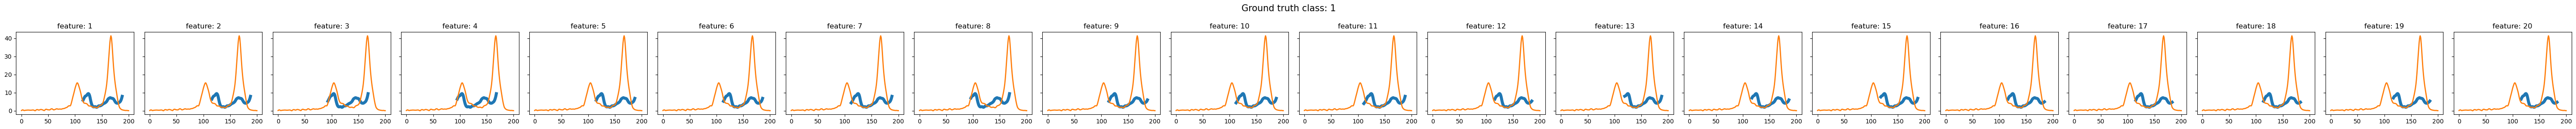

-------------
201
1


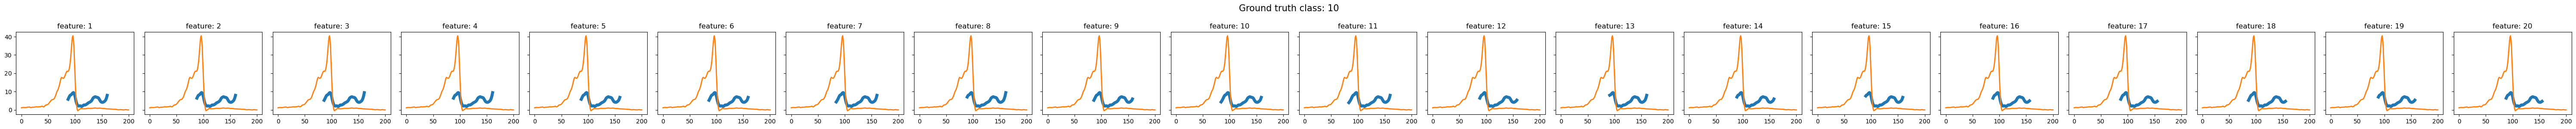

-------------
201
10


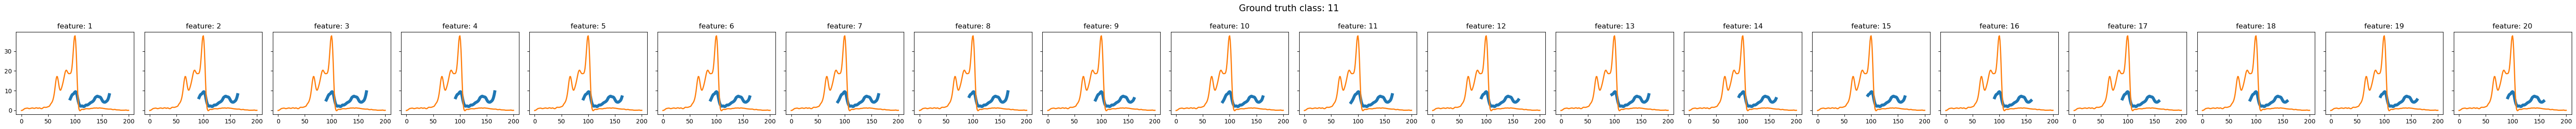

-------------
201
11


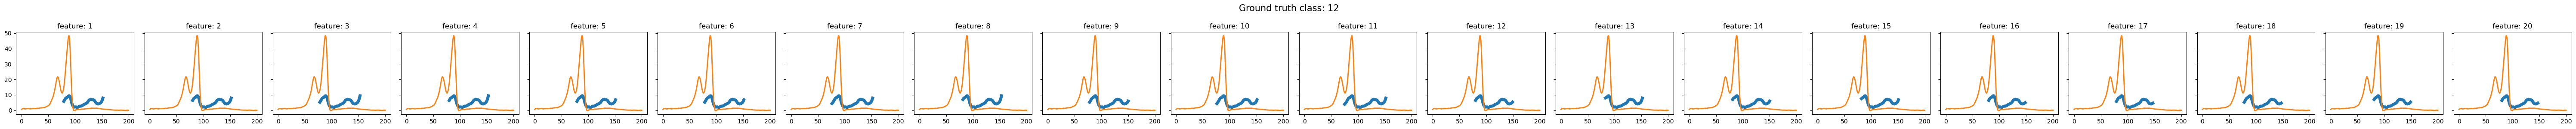

-------------
201
12


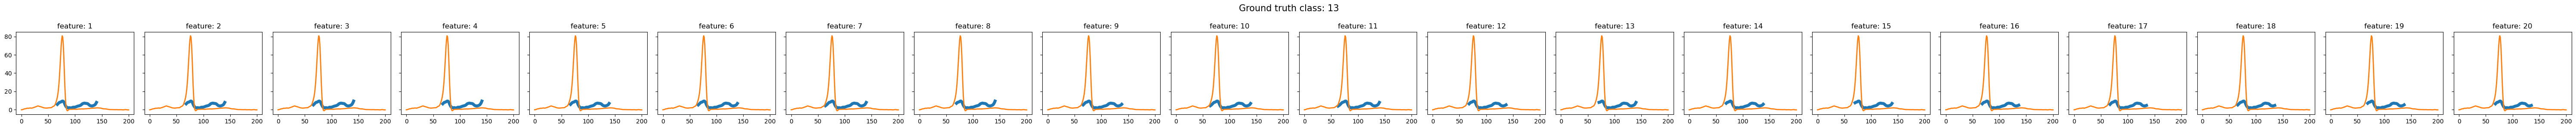

-------------
201
13


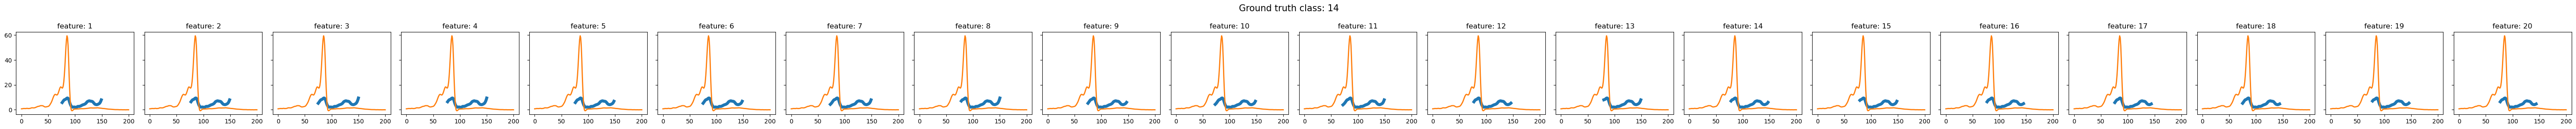

-------------
201
14


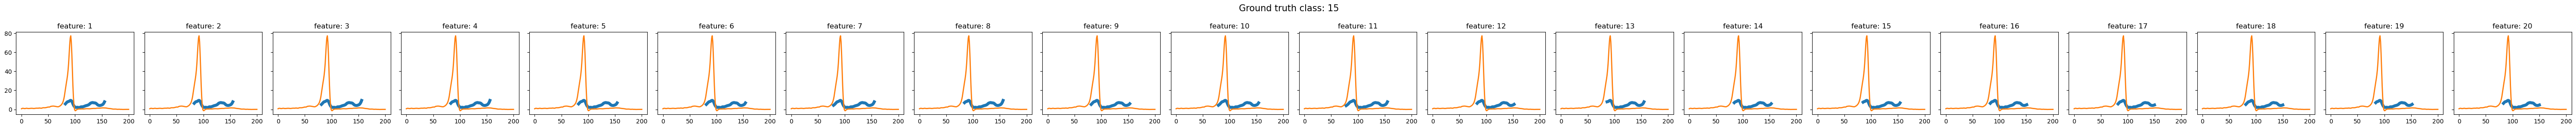

-------------
201
15


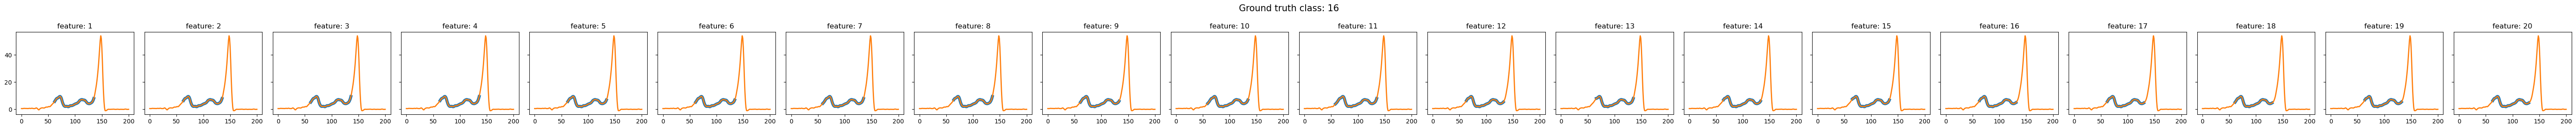

-------------
201
16


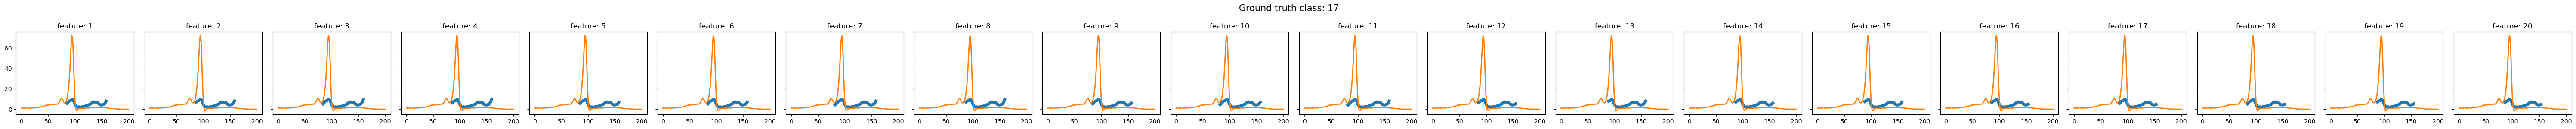

-------------
201
17


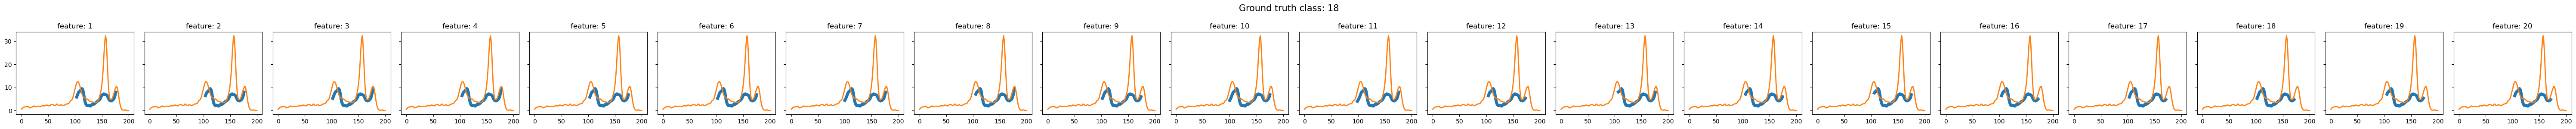

-------------
201
18


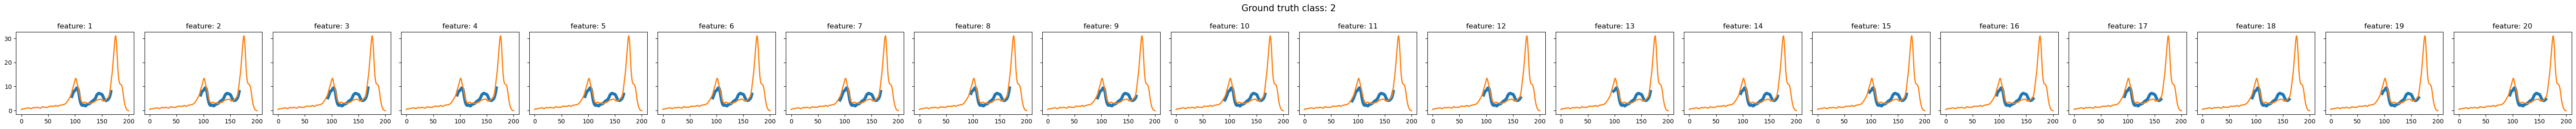

-------------
201
2


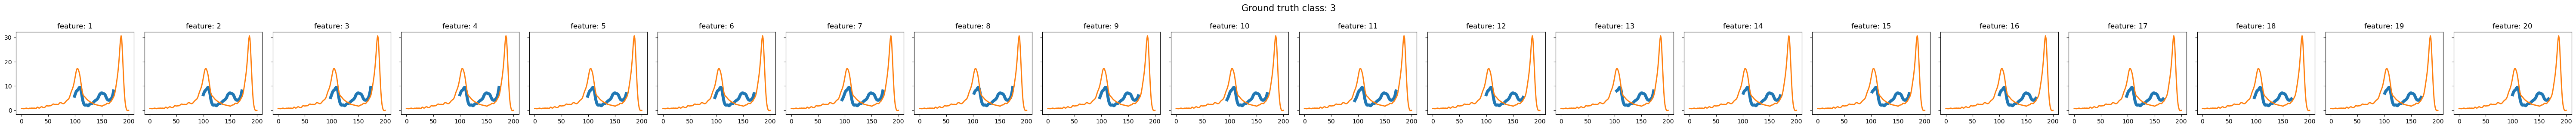

-------------
201
3


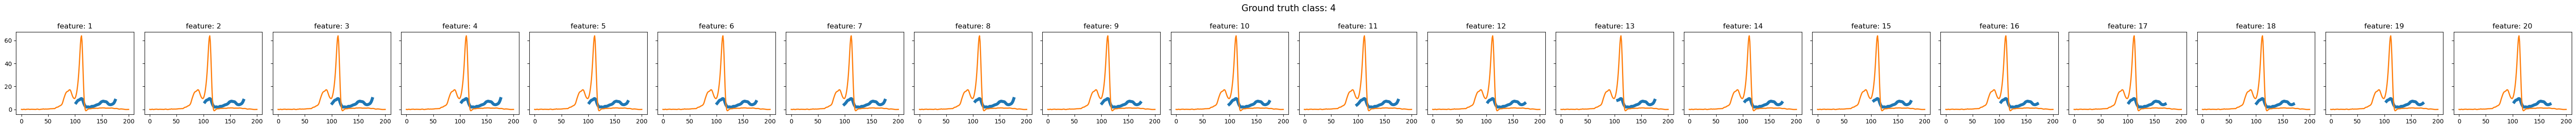

-------------
201
4


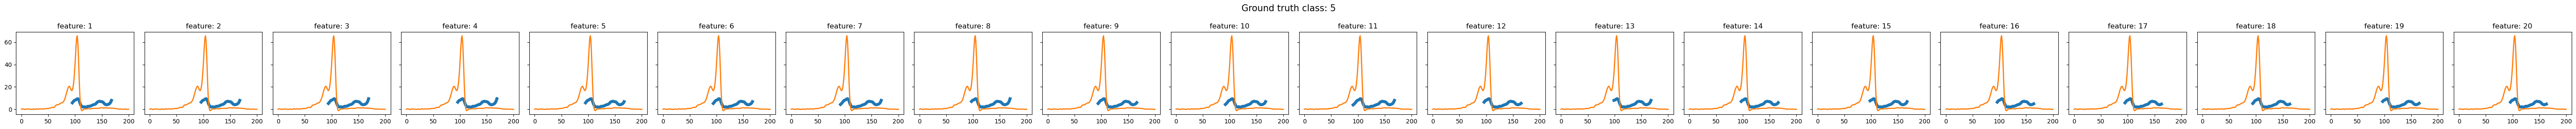

-------------
201
5


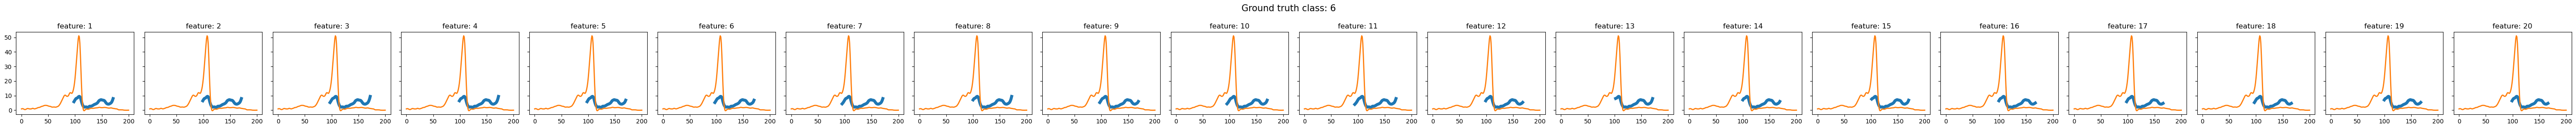

-------------
201
6


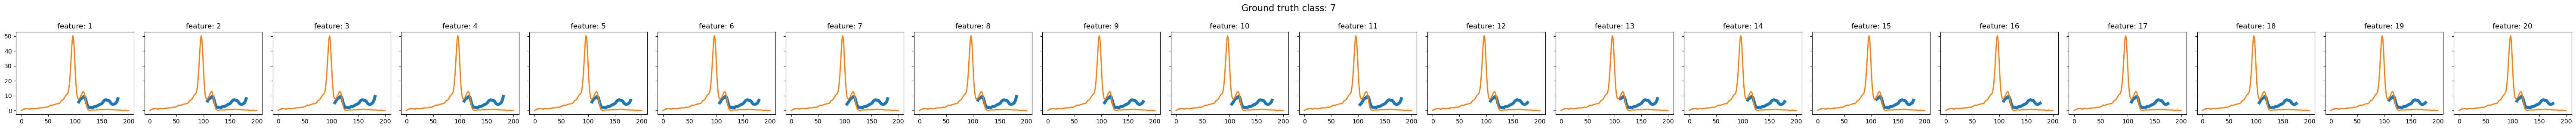

-------------
201
7


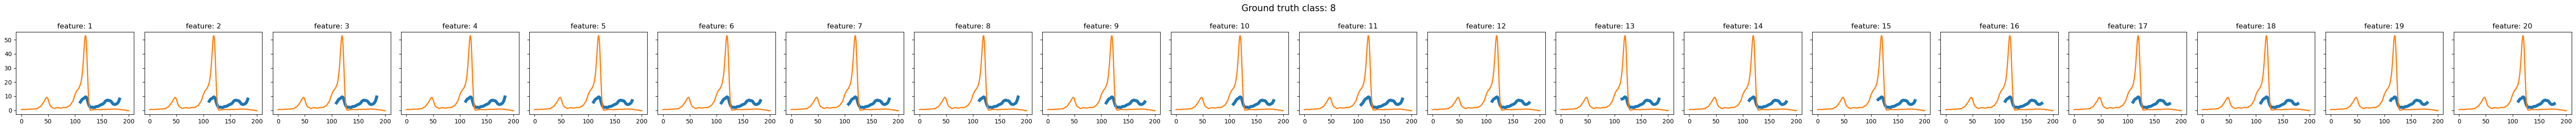

-------------
201
8


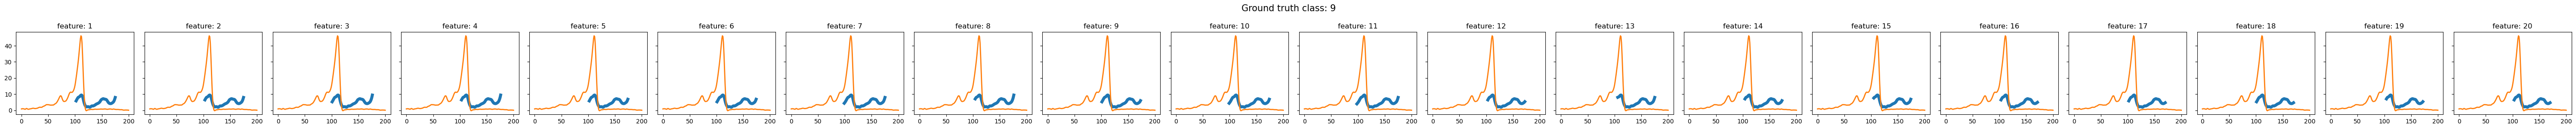

-------------
201
9
42300
42300


In [ ]:
top_features=20
for c, ts in rsast_ridge.kernels_generators_.items():
    fname = f'images_features_exp/{ds}-r_ridge-class{c}-top{top_features}-features-on-ref-ts.jpg'
    plot_most_important_feature_on_ts(ts.squeeze(), c, rsast_ridge.kernel_orig_, rsast_ridge.classifier.coef_[0], limit=top_features, offset=0, fname=fname) # plot only the first model one-vs-all model's features
    print("-------------")
    print(ts.squeeze().size) 
    print(c), 
print(len(rsast_ridge.kernel_orig_))
print(rsast_ridge.classifier.coef_[0].size) 

In [ ]:
top_features=20
for c, ts in sast_ridge.kernels_generators_.items():
    fname = f'images_features_exp/{ds}-ridge-class{c}-top{top_features}-features-on-ref-ts.jpg'
    plot_most_important_feature_on_ts(ts.squeeze(), c, sast_ridge.kernel_orig_, sast_ridge.classifier.coef_[0], limit=top_features, offset=0, fname=fname) # plot only the first model one-vs-all model's features
    print("-------------")
    print(ts.squeeze().size) 
    print(c), 
print(len(sast_ridge.kernel_orig_))
print(sast_ridge.classifier.coef_[0].size) 